<a href="https://colab.research.google.com/github/tom2rd/Googlecolabutils/blob/master/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Open CV を使って　ボッチャの球の距離を測る

OpenCV とGoogle Driveと

https://karaage.hatenadiary.jp/entry/2018/12/17/073000

画像処理１００本ノック

https://github.com/yoyoyo-yo/Gasyori100knock

Google Colab のTips

https://colab.research.google.com/drive/1DWsWxjutpWnA_ig-DGqF2QnpTSTlIDmq

Google Drive のマウント

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
import os
os.chdir('./My Drive/Colab Notebooks/') 
!ls

OpenCV NumPy Matplot 　の読み込み。
cv2.imshowは、動かないので、cv2_imshow を使う

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
font = cv2.FONT_HERSHEY_COMPLEX
from google.colab.patches import cv2_imshow

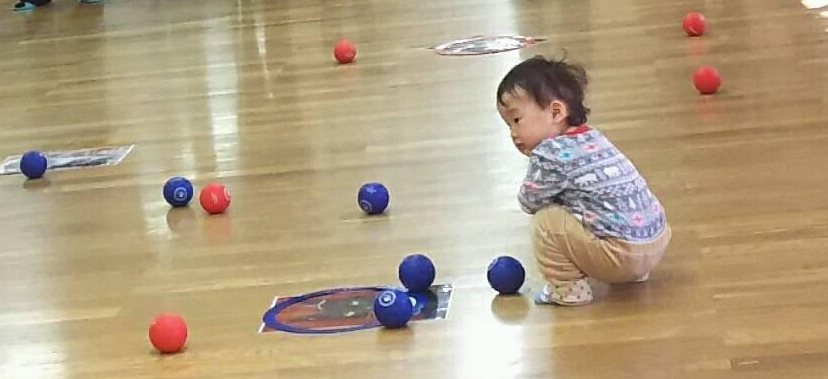

In [0]:
img = cv2.imread("boccha.png", cv2.IMREAD_COLOR )
cv2_imshow(img)

HSVでカラーピックする。

チュートリアルから
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html#converting-colorspaces

カラー見本
http://colorizer.org/

https://www.tydac.ch/color/

https://stackoverflow.com/questions/36817133/identifying-the-range-of-a-color-in-hsv-using-opencv

For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]
でピックした色で試す　青

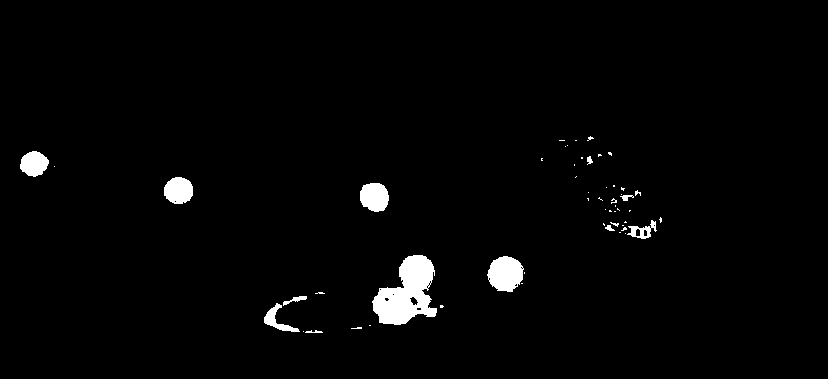

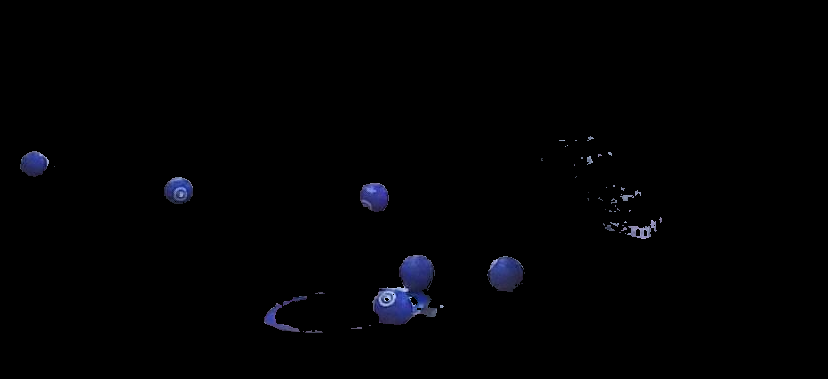

In [0]:
# Convert BGR to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask= mask)

    cv2_imshow(mask)
    cv2_imshow(res)

http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/houghCircles.html

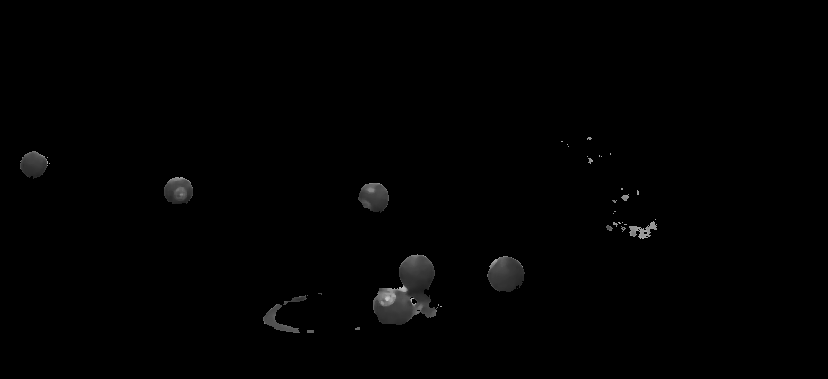

In [0]:
img = cv2.imread("boccha.png", cv2.IMREAD_COLOR )
img = cv2.medianBlur(img,5)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(img,img, mask= mask)
cimg = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
 
circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,1,20, param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
 cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
 cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
 
cv2_imshow(cimg)

赤
http://i.stack.imgur.com/gCNJp.jpg

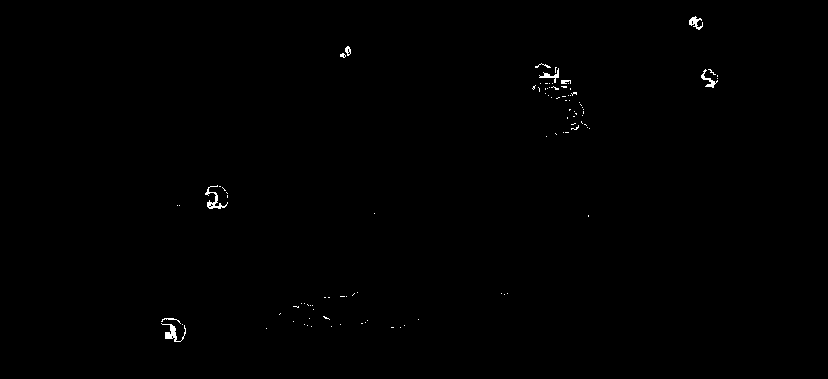

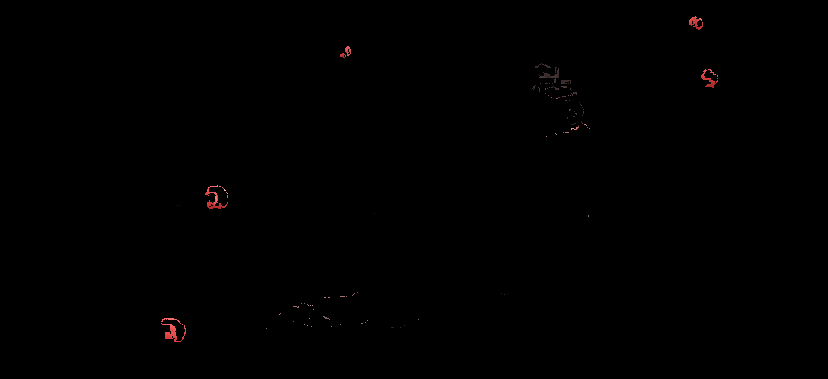

In [0]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([0,50,10])
upper_blue = np.array([0,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)

cv2_imshow(mask)
cv2_imshow(res)